In [ ]:
!pip install pdf2image
!pip install fitz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.1 MB/s eta 0:00:00


In [1]:
!pip install PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 43.6 MB/s eta 0:00:00


In [2]:
import fitz

pdffile = "/content/Padilla - Nobleza virtuosa_testExtract.pdf"
doc = fitz.open(pdffile)
for i in range(0,16):
  page = doc.load_page(i)  # number of page
  pix = page.get_pixmap()
  output = f"/content/images/{i+1}.png"
  pix.save(output)

doc.close()

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
import transformers
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-printed',lang='spa')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-printed')

def ocr_image(img):
  pixel_values = processor(images=img, return_tensors="pt").pixel_values
  generated_ids = model.generate(pixel_values,max_new_tokens=512)
  return processor.batch_decode(generated_ids, skip_special_tokens=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.43G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [15]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from PIL import Image
import torch

def image_to_text(image):
  processor = TrOCRProcessor.from_pretrained('qantev/trocr-large-spanish')
  model = VisionEncoderDecoderModel.from_pretrained('qantev/trocr-large-spanish')
  pixel_values = processor(images=image, return_tensors="pt").pixel_values

  generated_ids = model.generate(pixel_values)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

  return generated_text

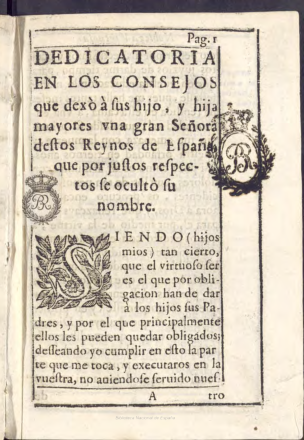

In [5]:
import requests
from IPython.display import display
from PIL import Image

def show_image(path):
  img = Image.open(path).convert("RGB")
  display(img)
  return img

image1 = show_image('/content/images/1.png')

In [6]:
ocr_image(image1)

['E']

In [16]:
image_to_text(image1)

preprocessor_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/420 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1339: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


''

In [ ]:
image1.size[0]

304

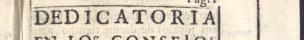

['DEDICATORIA']


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1339: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


DEDICATORIA,   


In [18]:
img1 = image1.crop((0, 40, image1.size[0], 80))
display(img1)
print(ocr_image(img1))
print(image_to_text(img1))

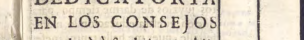

['EN LOS CONSEJOS']


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1339: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


 EN LOS CONSEJOS   


In [19]:
img2 = image1.crop((0, 60, image1.size[0], 100))
display(img2)
print(ocr_image(img2))
print(image_to_text(img2))

In [20]:
img3 = image1.crop((0, 90, image1.size[0], 120))
display(img3)
print(ocr_image(img3))
print(image_to_text(img3))

['QUE DEXDA LUS HIJO, Y HIJA']


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1339: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


que dexó a fus hijo, y hija 2


In [21]:
img4 = image1.crop((0, 110, image1.size[0], 140))
display(img4)
print(ocr_image(img4))
print(image_to_text(img4))

['MAYORES VNA GRAN SERORA']


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1339: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


 mayores vna gran Señorástico


In [22]:
img5 = image1.crop((0, 130, image1.size[0], 160))
display(img5)
print(ocr_image(img5))
print(image_to_text(img5))

['DEATOS REYNOS DE ESPANOLO']


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1339: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


deftos Reynos de Elpaign (50%)


In [23]:
img6 = image1.crop((0, 150, image1.size[0], 180))
display(img6)
print(ocr_image(img6))
print(image_to_text(img6))

['QUE PORJUILOS REFPEC- VEGL']


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1339: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


I, que por jultos refpec- y John


In [ ]:
img7 = image1.crop((0, 170, image1.size[0], 200))
display(img7)
ocr_image(img7)

['ROTSLE OCULTO FA']

In [ ]:
img8 = image1.crop((0, 190, image1.size[0], 220))
display(img8)
ocr_image(img8)

['SR. COMBREAD']

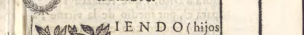

'ITEMS ARE IN DO (BIES'

In [ ]:
img9 = image1.crop((0, 210, image1.size[0], 245))
display(img9)
ocr_image(img9)

In [ ]:
img10 = image1.crop((0, 230, image1.size[0], 260))
display(img10)
ocr_image(img10)

['MAMANANANANANANAN']

In [ ]:
img11 = image1.crop((0, 250, image1.size[0], 280))
display(img11)
ocr_image(img11)

['LAY FACE OF VICTORIA PER']

In [ ]:
img12 = image1.crop((0, 270, image1.size[0], 300))
display(img12)
ocr_image(img12)

['TOTAL RECEIPT']

In [ ]:
img13 = image1.crop((0, 290, image1.size[0], 320))
display(img13)
ocr_image(img13)

['ITEMPLY, LOS HIJOS PAPER']

In [ ]:
img14 = image1.crop((0, 310, image1.size[0], 340))
display(img14)
ocr_image(img14)

['DRESS,Y POR EL QUE PRINCIPALMENTE']

In [ ]:
img15 = image1.crop((0, 330, image1.size[0], 360))
display(img15)
ocr_image(img15)

['DELLERADO YO CUMPLER EN DETAIL PARA']

In [ ]:
img16 = image1.crop((0, 350, image1.size[0], 380))
display(img16)
ocr_image(img16)

['THE ONE ARE TOCA, Y EXECUTAROS EN LA,']

In [ ]:
img17 = image1.crop((0, 370, image1.size[0], 400))
display(img17)
ocr_image(img17)

['A VOCITRA, NO ADJENDATE PERUICO BUCF']

In [6]:
# cleaning generated text

import re

def clean_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Remove unwanted characters such as numbers and special symbols
    cleaned_text = re.sub(r'[^a-zA-Z\s.,]', '', text)

    # Remove extra whitespace and normalize spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text.strip())

    return cleaned_text

In [7]:
generated_text = clean_text('/content/1.txt')

In [8]:
with open('/content/1_actual.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [6]:
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 32.1 MB/s eta 0:00:00


In [9]:
import Levenshtein

def evaluate_text_similarity(generated_text, actual_text):
    distance = Levenshtein.distance(generated_text, actual_text)
    similarity_ratio = Levenshtein.ratio(generated_text, actual_text)

    print("Levenshtein Distance:", distance)
    print("Similarity Ratio:", similarity_ratio)

In [10]:
import editdistance
def evaluate_ocr(reference_text, hypothesis_text):
    cer = editdistance.eval(reference_text, hypothesis_text) / max(len(reference_text), len(hypothesis_text))
    wer = editdistance.eval(reference_text.split(), hypothesis_text.split()) / len(reference_text.split())
    return cer, wer

In [1]:

!pip install editdistance

In [11]:
evaluate_text_similarity(generated_text,text)

Levenshtein Distance: 199
Similarity Ratio: 0.7274633123689728


In [12]:
cer_score, wer_score = evaluate_ocr(generated_text,text)
print("Character Error Rate:", cer_score)
print("Word Error Rate:", wer_score)

Character Error Rate: 0.38715953307393
Word Error Rate: 0.6057692307692307


# Training the Model

In [ ]:
import os
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from transformers import TrOCRProcessor

class OCRDataset(Dataset):
    def __init__(self, image_dir, labels_file, processor):
        self.image_dir = image_dir
        self.processor = processor
        self.samples = self._load_samples(labels_file)

    def _load_samples(self, labels_file):
        samples = []
        with open(labels_file, 'r') as f:
            lines = f.readlines()
            idx = 1  # indexing images from 1.png
            for line in lines:
                if line.startswith("PDF p"):
                    text = ""
                    continue
                if line.strip():  # Skip empty lines
                    text += line.strip() + "\n"
                else:
                    image_path = os.path.join(self.image_dir, f"{idx}.png")
                    samples.append((image_path, text.strip()))
                    idx += 1
        return samples

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        image_path, text = self.samples[idx]
        image = Image.open(image_path).convert("RGB")
        encoding = self.processor(image, return_tensors="pt")
        encoding['pixel_values'] = encoding['pixel_values'].squeeze(0)  # Remove first dimension
        encoding['labels'] = torch.tensor([self.processor.tokenizer.encode(text)])
        return encoding

image_dir = '/content/images/'
labels_file = '/content/labels.txt'

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')

# Create dataset instances
train_dataset = OCRDataset(image_dir=image_dir, labels_file=labels_file, processor=processor)
eval_dataset = OCRDataset(image_dir=image_dir, labels_file=labels_file, processor=processor)

# Create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=4)

# Verify data loading
for batch in train_loader:
    print(batch)
    break


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Token indices sequence length is longer than the specified maximum sequence length for this model (639 > 512). Running this sequence through the model will result in indexing errors


{'pixel_values': tensor([[[[-0.4980, -0.5294, -0.5216,  ..., -0.4588, -0.4588, -0.4588],
          [-0.5294, -0.5216, -0.5137,  ..., -0.4510, -0.4510, -0.4510],
          [-0.5373, -0.5373, -0.5294,  ..., -0.4510, -0.4510, -0.4510],
          ...,
          [ 0.8510,  0.8353,  0.8353,  ...,  0.5451,  0.0588, -0.3882],
          [ 0.8510,  0.8431,  0.8745,  ...,  0.0510, -0.3098, -0.4431],
          [ 0.8353,  0.8353,  0.8588,  ..., -0.3647, -0.4510, -0.4745]],

         [[-0.5216, -0.5451, -0.5373,  ..., -0.5137, -0.5137, -0.5137],
          [-0.5451, -0.5373, -0.5294,  ..., -0.5059, -0.5059, -0.5059],
          [-0.5529, -0.5529, -0.5529,  ..., -0.4980, -0.4980, -0.4980],
          ...,
          [ 0.7333,  0.7255,  0.7255,  ...,  0.4588, -0.0275, -0.4745],
          [ 0.7333,  0.7333,  0.7647,  ..., -0.0353, -0.3961, -0.5294],
          [ 0.7176,  0.7255,  0.7569,  ..., -0.4588, -0.5373, -0.5608]],

         [[-0.4353, -0.4667, -0.4588,  ..., -0.4275, -0.4275, -0.4353],
          [-0

In [ ]:
for batch in train_loader:
    pixel_values = batch['pixel_values']
    print("Shape of pixel_values:", pixel_values.shape)
    break


Unused or unrecognized kwargs: padding, truncation.


Shape of pixel_values: torch.Size([1, 1, 3, 384, 384])


In [ ]:
for batch in train_loader:
    pixel_values = batch['pixel_values']
    # Remove the first dimension
    pixel_values = pixel_values.squeeze(0)
    print("Shape of pixel_values after squeezing:", pixel_values.shape)
    break


Unused or unrecognized kwargs: padding, truncation.


Shape of pixel_values after squeezing: torch.Size([1, 3, 384, 384])


In [ ]:
from transformers import VisionEncoderDecoderModel, Trainer, TrainingArguments, TrOCRProcessor

# Load the processor and model
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')

# Set decoder_start_token_id and pad_token_id in the model configuration
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id

# Define training arguments
training_args = TrainingArguments(
    output_dir="./trocr_trained",
    num_train_epochs=50,  # Adjusted number of epochs
    per_device_train_batch_size=2,  # Adjusted batch size
    per_device_eval_batch_size=2,  # Adjusted batch size
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,  # Adjusted logging steps
    evaluation_strategy="epoch",  # Perform evaluation at the end of each epoch
    save_strategy="epoch",  # Save model at the end of each epoch
    save_total_limit=1,  # Save only the best model
)

# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)

# Train the model
trainer.train()


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` i

Epoch,Training Loss,Validation Loss
1,No log,16.392841
2,No log,16.267832
3,No log,16.031717
4,No log,15.714211
5,No log,15.355038
6,No log,14.994493
7,No log,14.657985
8,No log,14.348669
9,No log,14.050756
10,15.309800,13.743152


TrainOutput(global_step=50, training_loss=10.113786926269531, metrics={'train_runtime': 2410.3001, 'train_samples_per_second': 0.021, 'train_steps_per_second': 0.021, 'total_flos': 3.74142595497984e+16, 'train_loss': 10.113786926269531, 'epoch': 50.0})

In [ ]:
from transformers import Trainer

# Update training arguments for continued training
training_args.num_train_epochs = 100  # number of epochs

# Create Trainer for continued training
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)

# Continue training the model
trainer.train()


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,6.495888
2,No log,6.489324
3,No log,6.479643
4,No log,6.472013
5,No log,6.469396
6,No log,6.466254
7,No log,6.458308
8,No log,6.447013
9,No log,6.438086
10,6.558900,6.435133


In [ ]:
!pip install transformers[torch]

In [ ]:
!pip install --upgrade accelerate

In [ ]:
!jupyter notebook restart

[C 09:54:26.347 NotebookApp] No such file or directory: /content/restart


In [ ]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install transformers[torch] --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.4/346.4 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

# Evaluating the Model

In [ ]:
from transformers import Trainer, TrainingArguments

def evaluate_model(model, eval_dataset):
    # Define the evaluation arguments
    eval_args = TrainingArguments(
        output_dir="./trocr_eval",
        per_device_eval_batch_size=4,
        logging_dir="./logs",
    )

    # Create Trainer instance for evaluation
    trainer = Trainer(
        model=model,
        args=eval_args,
    )

    # Evaluate the model on the evaluation dataset
    eval_result = trainer.evaluate(eval_dataset)

    return eval_result



In [ ]:
eval_result = evaluate_model(model, eval_dataset)
print("Evaluation result:", eval_result)


Unused or unrecognized kwargs: padding, truncation.


Evaluation result: {'eval_loss': 15.355037689208984, 'eval_runtime': 0.2442, 'eval_samples_per_second': 4.095, 'eval_steps_per_second': 4.095}
